In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt

In [0]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [0]:
# Initialise Q Matrix 
Q = np.matrix(np.zeros([11,11]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Define initial parameters 
alpha = 0.9 # alpha is the learning rate
gamma = 0.8 # gamma is the discount factor 
epsilon = 0.1 # epsilon is the exploration factor
decay = 0.95 # df is the decay factor for epsilon

In [0]:
def q_learning(alpha, gamma, epsilon, decay):
    
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # randomly select the next action and record in steps
  next_action = int(np.random.choice(av_act,1))
  
  # epislon greedy policy
  if np.random.uniform(0, 1) > epsilon:
    one_step_ahead_q_value = np.max(Q[next_action, :])
  else:
    one_step_ahead_q_value = np.random.choice(np.array(Q[next_action,:]).ravel())
  
  # update Q-matrix
  Q[current_state, next_action] = Q[current_state, next_action] + alpha * (R[current_state, next_action] + gamma * one_step_ahead_q_value - Q[current_state, next_action])
  
  # update epsilon value
  epsilon *= decay
  
  # return Q-matrix and number of steps
  return Q

In [0]:
for i in range(100):
  q_learning(alpha, gamma, 0, 1)
print(Q)

[[ 59.4411273   84.8325942    0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.          59.80239176 106.35678066   0.          88.08382762
  122.33864947   0.           0.           0.           0.
    0.        ]
 [  0.          81.03216758 120.74392578 153.38588279   0.
    0.         227.22035589   0.           0.           0.
    0.        ]
 [  0.           0.         104.23878945 147.18986866   0.
    0.         237.6733932    0.           0.           0.
    0.        ]
 [  0.          88.08382762   0.           0.           0.
  134.57251442   0.           0.          69.76239147   0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.         169.91479093  98.39232      0.           0.
    0.        ]
 [  0.           0.         104.88678945 152.23228727   0.
  122.33864947 178.08382762   0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  


In [0]:
step_cont = []
total_reward = []

for i in range(100):
  
  # generate Q-matrix for each iteration
  q_learning(alpha, gamma, 0, 1)
#   print('generate Q-matrix')
  
  # initialise random start state to evaluate performance
  current_state = randint(0,10)
  steps = [current_state]
  reward = 0
#   print('finish initialisation')
  
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  else:
    while current_state != 6:

#       next_step = np.argmax(Q[current_state, :])
#       next_reward = np.max(Q[current_state, :])
#       steps.append(next_step)
#       reward += next_reward
#       current_state = next_step
     
      
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
      
      if max_index.shape[0] > 1:
        next_step = int(np.random.choice(max_index, size = 1))
      else:
        next_step = int(max_index)
      
      next_reward = np.max(Q[current_state, max_index])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  total_reward.append((i, reward/len(steps)))  
  step_cont.append((i, len(steps)))
#   print('calculate')

print(Q)
print(total_reward)
print(step_cont)

[[180.32618552 225.24002651   0.           0.         225.55286839
    0.           0.           0.           0.           0.
    0.        ]
 [177.57148879 221.71413364 338.21768143   0.         226.2112292
  281.9479777    0.           0.           0.           0.
    0.        ]
 [  0.         209.09100112 328.21715012 313.29284382   0.
    0.         424.0745547    0.           0.           0.
    0.        ]
 [  0.           0.         288.77822131 232.02254178   0.
    0.         402.90354498   0.           0.           0.
    0.        ]
 [164.36791296 225.45155061   0.           0.         226.05444809
  283.49458454   0.           0.         132.32412047 172.36041926
    0.        ]
 [  0.         139.24807998   0.           0.         226.2651081
  283.53183712 423.43954253 289.7565227    0.           0.
    0.        ]
 [  0.           0.         280.19982745 283.57310742   0.
  283.56012545 405.1705052  286.71659692   0.           0.
    0.        ]
 [  0.           0.     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater_equal


In [0]:
step_cont = []
average_reward = []

def evaluate(Q, episode):
  
  current_state = randint(0,10)
  steps = [current_state]
  reward = 0
  
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  else:
    while current_state != 6:

      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
      
      if max_index.shape[0] > 1:
        next_step = int(np.random.choice(max_index, size = 1))
      else:
        next_step = int(max_index)
      
      next_reward = np.max(Q[current_state, max_index])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, reward/len(steps)))  
  step_cont.append((episode, len(steps)))
  
  return average_reward, step_cont

In [0]:
r, s = evaluate(Q, 1)

print(r)
print(s)

[(1, 212.0372773515055)]
[(1, 2)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater_equal


In [0]:
      current_state = 1

      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
      
      if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
      else:
        max_index = int(max_index)
        
      max_index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


2

In [0]:
Q[current_state,]

matrix([[  0.        , 131.42895987, 269.61193994,   0.        ,
         168.35182444, 267.43803877,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ]])

In [0]:
np.max(Q[current_state, max_index])

269.6119399401392

In [0]:
Q[current_state,]

matrix([[ 88.86386864, 102.11609022, 170.06306566,   0.        ,
          76.1840967 , 176.93828835,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ]])

In [0]:
np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]

array([5])

In [0]:
Q[current_state,:]

matrix([[ 88.86386864, 102.11609022, 170.06306566,   0.        ,
          76.1840967 , 176.93828835,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ]])

In [0]:
df_reward = pd.DataFrame.from_records(total_reward, columns = ['Episodes', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['Episodes','Steps'])

df = pd.merge(df_reward, df_step, on='Episodes')
df.head(5)

,Episodes,Average Reward Per Step,Steps
0,0,247.500000,2
1,1,301.250000,4
2,2,301.250000,4
3,3,296.666667,3
4,4,296.666667,3


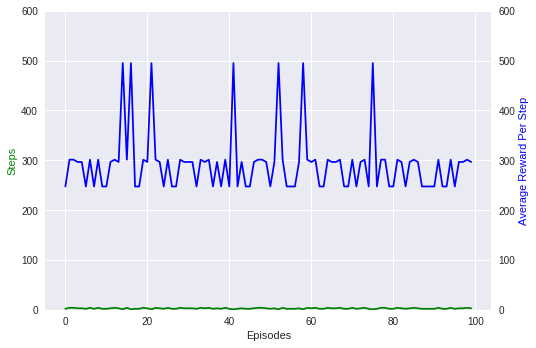

In [0]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['Episodes'], df['Steps'],'g-')
ax2.plot(df['Episodes'], df['Average Reward Per Step'], 'b-')

ax1.set_ylim(0, 600)
ax2.set_ylim(0, 600)

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Steps', color='g')
ax2.set_ylabel('Average Reward Per Step', color='b')

plt.show()

In [0]:
# Testing
current_state = 2
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q[current_state, :])
    next_reward = np.max(Q[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(reward)

Selected path:
[3, 7]
Steps:
2
Rewards:
136.656


In [0]:
result = []
episode = [100]
alpha = [0.9]
gamma = [0.8]
epsilon = [0.1]
decay = [0.95]

for alpha in alpha:
  for gamma in gamma:
    for epsilon in epsilon:
      for decay in decay:
        for episode in range(episode):
          q_learning(alpha, gamma,epsilon, decay)
          result.append((alpha, gamma, epsilon, decay, episode, ))